# Introduction
In this exercise, a regression line will be fitted into the data. The data of this exercise is a survey. After that, some hyposis testing will be done.

In [71]:
# Install dc_stat_think if you haven't already
#%pip install dc_stat_think

In [72]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst

# Linear regression line
In this chapter, we're going to fit a regression line for the 'accuracy' column with the 'B4' column ('I use my brain'). First, some EDA will be applied to check if the data is clean. Then, it will be explained why this feature was chosen. And finally the legression line will be drawn.

## EDA

In [73]:
# Read the dataset and extract the columns
data = pd.read_csv('data.csv', sep = "\t")
cols = ['accuracy', 'B4', 'age', 'elapsed']

# Show general information about the features
print(data[cols].describe())
print(data[cols].info())

           accuracy            B4           age       elapsed
count  4.915900e+04  49159.000000  4.915900e+04  4.915900e+04
mean   4.764119e+04      4.315853  4.371320e+04  2.506205e+03
std    9.704611e+06      0.833983  9.685640e+06  5.082819e+04
min    1.000000e+00      0.000000  1.300000e+01  5.000000e+00
25%    8.500000e+01      4.000000  1.800000e+01  5.840000e+02
50%    9.000000e+01      4.000000  2.100000e+01  7.540000e+02
75%    9.700000e+01      5.000000  3.000000e+01  1.045000e+03
max    2.147484e+09      5.000000  2.147484e+09  8.534589e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   accuracy  49159 non-null  int64
 1   B4        49159 non-null  int64
 2   age       49159 non-null  int64
 3   elapsed   49159 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB
None


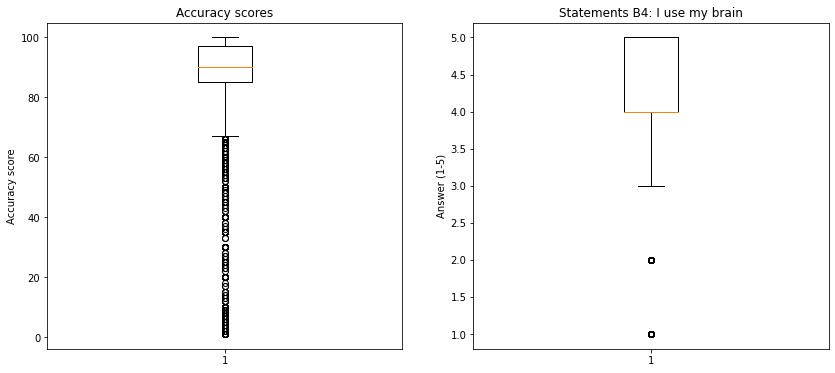

In [74]:
# Draw boxplots of the sets using seaborn
fig, ax = plt.subplots(ncols = 2, figsize=(14, 6))

# Draw first boxplot
ax[0].boxplot(df_lin.accuracy, vert = True)
ax[0].set_title("Accuracy scores")
ax[0].set_ylabel("Accuracy score")

# Draw second boxplot
ax[1].boxplot(df_lin.B4, vert = True)
ax[1].set_title("Statements B4: I use my brain")
ax[1].set_ylabel("Answer (1-5)")

plt.show()

### Findings
Based on the info method, we can see that from the data we're going to use, there're no missing values and they're set to the appropiate data type. However, we can see that age and accuracy have huge outliers and some answers of B4 have the value 0. Both rows will be dealt with. Accuracy will have a maximum of 100, age will have a maximum of 80, B4 will have a minimum of 1 and elapsed time will have a maximum of 3 hours (10800 seconds)

In [75]:
# Clean the outliers
df_lin = data.loc[(data['accuracy'] <= 100) & (data.age <= 80) 
                          & (data.B4 > 0) & (data.elapsed <= 10800)]

df_lin_clean = df_lin[cols]

df_lin_clean.describe()

,accuracy,B4,age,elapsed
count,47921.000000,47921.000000,47921.000000,47921.000000
mean,88.517518,4.359049,25.327268,988.651656
std,12.148270,0.718208,11.030914,916.724892
min,1.000000,1.000000,13.000000,5.000000
25%,85.000000,4.000000,18.000000,586.000000
50%,90.000000,4.000000,21.000000,752.000000
75%,97.000000,5.000000,29.000000,1028.000000
max,100.000000,5.000000,80.000000,10775.000000


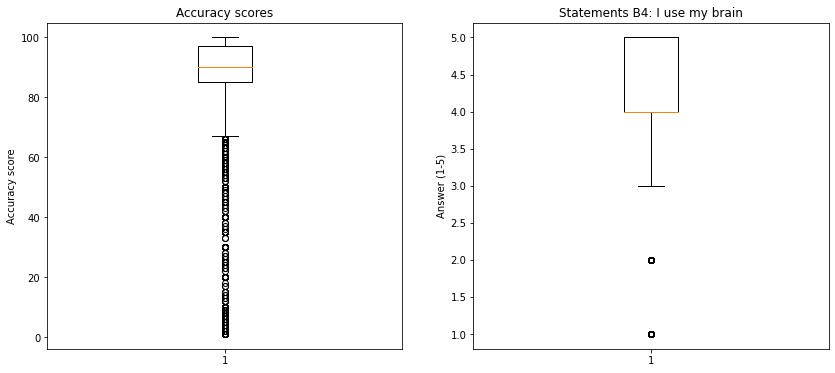

In [76]:
# Draw boxplots of the sets using seaborn
fig, ax = plt.subplots(ncols = 2, figsize=(14, 6))

# Draw first boxplot 
ax[0].boxplot(df_lin_clean.accuracy, vert = True)
ax[0].set_title("Accuracy scores")
ax[0].set_ylabel("Accuracy score")

# Draw second boxplot
ax[1].boxplot(df_lin_clean.B4, vert = True)
ax[1].set_title("Statements B4: I use my brain")
ax[1].set_ylabel("Answer (1-5)")

plt.show()

## Motivation feature choice
The column 'B4' is chosen because of the question it contains: I use my brain. This type of questions indicates that the person is highly self-confident. You'll also see below that there's a correlation of the feature.

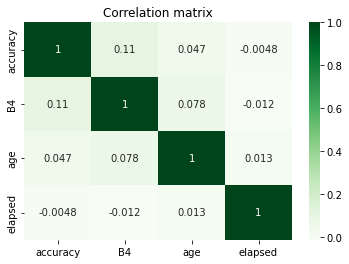

In [77]:
cor = df_lin_clean.corr()

# Display the correlation matrix
sns.heatmap(cor, annot=True, cmap = 'Greens')
plt.title("Correlation matrix")
plt.show()

## Regression line

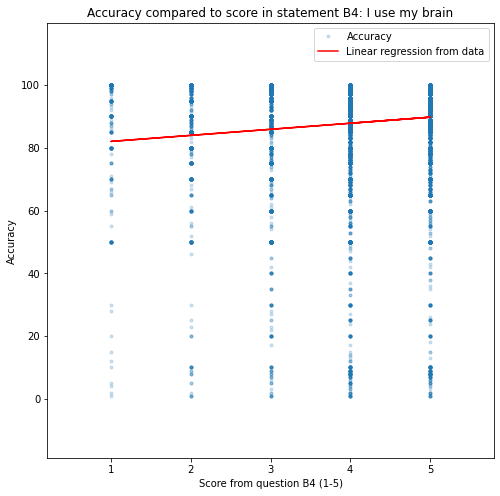

In [78]:
b4 = df_lin_clean.B4
acc = df_lin_clean.accuracy
slope, intercept = np.polyfit(b4,acc, 1)

fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(b4, acc, marker = '.',
         linestyle = 'none', alpha = 0.2, label = 'Accuracy')
ax.plot(b4, slope * b4 + intercept, color = 'red', label = "Linear regression from data")
plt.xlabel("Score from question B4 (1-5)")
plt.ylabel("Accuracy")
plt.title("Accuracy compared to score in statement B4: I use my brain")
plt.margins(0.2)
plt.legend()
plt.show()

### Findings
Accuracy slightly increases after answer from B4 increases as well. 

# Hypothesis testing
In this chapter, a hypothesis test will be performed. For this hypothesis test, the following questions will be used:
- I make people feel at ease (A6)
- I consider myself an average person (B9)
- I feel comfortable with myself (C2)
- I say what I think (D3)
- I respect authority (F4)

For this hypothesis test, we want to see if gender has an effect on how the Dutch respondents answered these questions on average.

In order to test that, we'll formulate the following null hypothesis:

_Gender has no influence on how the Dutch respondents answered the questions A6, B9, C2, D3 and F4._

## Gather data

In [79]:
# Gather the data based on the questions and gender
cols = ['gender', 'A6', 'B9', 'C2', 'D3', 'F4']

# Select the data based on the conditions and add new column: total
df_nl_male = df_lin.loc[(df_lin.gender == 1) & (df_lin.country == "NL"), cols].reset_index(drop = True)
df_nl_male['total'] = df_nl_male[cols[1:]].sum(axis = 1)
df_nl_female = df_lin.loc[(df_lin.gender == 2) & (df_lin.country == "NL"), cols].reset_index(drop = True)
df_nl_female['total']= df_nl_female[cols[1:]].sum(axis = 1)

# Display head and info
display(df_nl_male.head(), df_nl_female.head())
display(df_nl_male.info(), df_nl_female.info())

,gender,A6,B9,C2,D3,F4,total
0,1,2,1,2,4,1,10
1,1,3,2,4,3,3,15
2,1,4,4,4,4,2,18
3,1,4,2,5,4,2,17
4,1,4,4,4,4,4,20


,gender,A6,B9,C2,D3,F4,total
0,2,5,2,5,5,1,18
1,2,5,4,5,2,4,20
2,2,4,2,3,5,3,17
3,2,4,2,4,3,3,16
4,2,4,4,4,3,5,20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gender  122 non-null    int64
 1   A6      122 non-null    int64
 2   B9      122 non-null    int64
 3   C2      122 non-null    int64
 4   D3      122 non-null    int64
 5   F4      122 non-null    int64
 6   total   122 non-null    int64
dtypes: int64(7)
memory usage: 6.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gender  135 non-null    int64
 1   A6      135 non-null    int64
 2   B9      135 non-null    int64
 3   C2      135 non-null    int64
 4   D3      135 non-null    int64
 5   F4      135 non-null    int64
 6   total   135 non-null    int64
dtypes: int64(7)
memory usage: 7.5 KB


None

None

## ECDF
In this chapter an ECDF will be plotted to show 

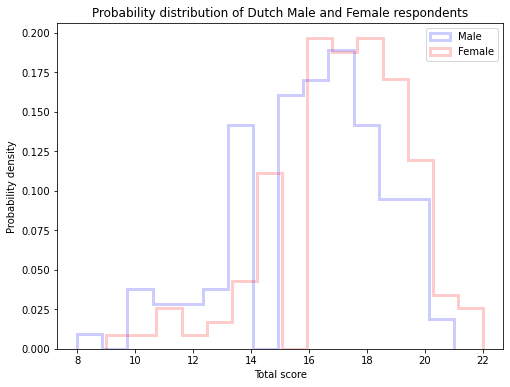

In [83]:
fig, ax = plt.subplots(figsize = (8, 6))

# Plot histograms
plt.hist(df_nl_male.total, label = "Male", alpha = 0.2, bins = 15, 
         density = True, color = 'blue', histtype = 'step', lw = 3)
plt.hist(df_nl_female.total, label = "Female", alpha = 0.2, bins = 15, 
         density = True, color = 'red', histtype = 'step', lw = 3)

# Label the axis and title
plt.xlabel("Total score")
plt.ylabel("Probability density")
plt.title("Probability distribution of Dutch Male and Female respondents")

# Show the plot
plt.legend()
plt.show()

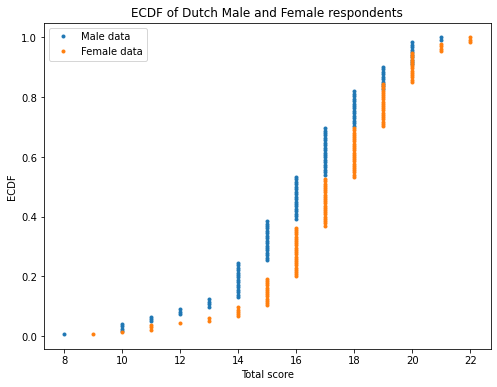

In [81]:
# Making ECDF plot 
fig, ax = plt.subplots(figsize = (8, 6))

# Set the ECDFs
x_male, y_male = dcst.ecdf(df_nl_male.total)
x_female, y_female = dcst.ecdf(df_nl_female.total)

# Plot the ECDF
plt.plot(x_male, y_male, marker='.', linestyle='none')
plt.plot(x_female, y_female, marker='.', linestyle='none')

# Set legend, axes and title
plt.legend(("Male data", "Female data"))
plt.xlabel("Total score")
plt.ylabel("ECDF")
plt.title("ECDF of Dutch Male and Female respondents")

plt.show()

### Findings
Based on the ECDF and histogram plot, we can see that in general, Dutch women tend to answer the questions higher than their male counterparts. This will affect how we're going to approach the statistical testing. 

## Statistical testing using bootstrap replicates

In [82]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((df_nl_female.total, df_nl_male.total)))

# Shift the samples based on the mean values
df_male_shifted = np.array(df_nl_male.total) - np.mean(df_nl_male.total) + combined_mean
df_female_shifted = np.array(df_nl_female.total) - np.mean(df_nl_female.total) + combined_mean

bs_replicates_male = dcst.draw_bs_reps(df_male_shifted, np.mean, 10000)
bs_replicates_female = dcst.draw_bs_reps(df_female_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_female - bs_replicates_male

mean_diff = (np.mean(df_nl_female.total) - np.mean(df_nl_male.total))

# Create the p-value for our null hypothesis testing. It's based on the difference of means from the data
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

print(f"p value is: {p}")

p value is: 0.0003


### Findings
After running the hypothesis testing, the P value range from 0.0001 to 0.0003. This indicates that a strong statstical significane between the two genders in the Netherlands. Based on that, we reject the null-hypothesis.